<a href="https://colab.research.google.com/github/hungpham13/Vietnamese-HTR/blob/main/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [ ]:
! pip install --quiet vietocr

     |████████████████████████████████| 948 kB 58.3 MB/s 
     |████████████████████████████████| 280 kB 69.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


# Inference

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
config = Cfg.load_config_from_name('vgg_transformer')

# config['weights'] = './weights/transformerocr.pth'
# config['weights'] = 'https://drive.google.com/uc?id=1--0gOdyQXIhQArom-bcDE0ZMuUeVvcUj'
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=True
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

detector = Predictor(config)

In [ ]:
! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
! unzip  -qq -o sample.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
To: /content/sample.zip
100% 306k/306k [00:00<00:00, 109MB/s]


('Nhà 87 ngữ 4/6 Đê La Waillan', 0.786316089864288)


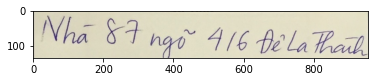

('phong 10A, trắng 1, là 09 - TTSB, khu đô thị Tây Nam linh đoàn', 0.8422775220486426)


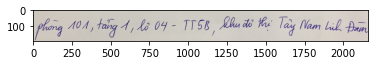

('96/7/12B Pham Văn Đồng, thánh phố Plaiku', 0.9012962028384208)


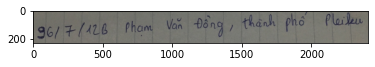

('Soi 30 Nguyễn Hòng, Làng Ha, Đồng Đa, Hà Nội', 0.8540649542754347)


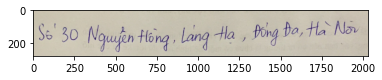

('90 A đường mới xuân thường p. tỉnh gia', 0.8506758801246944)


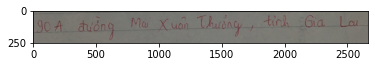

('58 Thái Thình, Đồng Đa, Hà Nội', 0.8792625933885574)


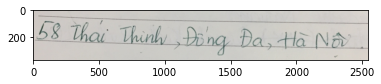

('Up Coverking Spoce, 19 làng đư, Hà Nội', 0.8530100042882719)


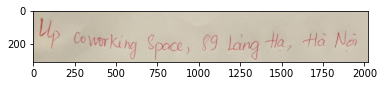

('492 Ngô Đức Kể, quân 4, Hồ Chí Minh', 0.8935669609478541)


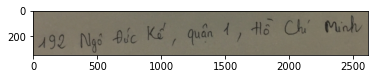

('Sở Y. 370/g Khu phó 5 B, phường Trên biển, biên Hòa, Đông Nai', 0.7968322646911027)


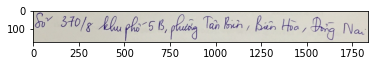

('Số 3 Nguyễn Ngoà Vũ, Hà Nội', 0.8650777273707919)


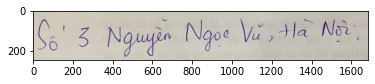

('Tòa nhì 34T, Hoàng Đạo Thuy, Hà Nữ', 0.8711379179183174)


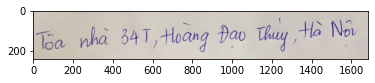

('Tình Eung Rato, 6, 255 - 251 đường Hung Tương, phường Vĩnh Trung', 0.8680901140905917)


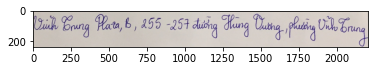

('168 Ngô Gia Tự, thành phố Hà Tính', 0.9010705062837312)


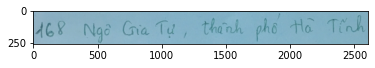

('40 Cát Linh, Đồng Đa, Hà Nội', 0.9062258643763406)


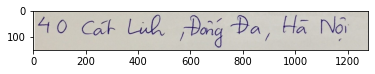

('Số 5 Công Tưởng Mê Linh, phường bến nghề , quân 4', 0.8369415767338811)


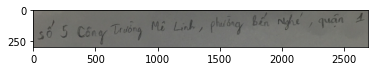

In [ ]:
import os
dir = "./Vietnamese-HTR/data/0825_DataSamples_1"
for img in os.listdir(dir):
    img = os.path.join(dir,img)
    if img[-4:] == "json": continue
    img = Image.open(img)
    plt.imshow(img)
    s = detector.predict(img, return_prob=True)
    print(s)
    plt.show()

# Download sample dataset

Very large dataset (1M images)

In [1]:
!gdown https://drive.google.com/uc?id=1T0cmkhTgu3ahyMIwGZeby612RpVdDxOR

Downloading...
From: https://drive.google.com/uc?id=1T0cmkhTgu3ahyMIwGZeby612RpVdDxOR
To: /content/ocr_dataset.zip
100% 7.71G/7.71G [02:17<00:00, 55.9MB/s]


InkDataline dataset

In [2]:
! gdown https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE

Downloading...
From: https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
To: /content/data_line.zip
100% 61.2M/61.2M [00:01<00:00, 51.9MB/s]


In [ ]:
# ! unzip -qq -o ./data_line.zip
! unzip -qq -o ./ocr_dataset.zip -d ./ocr_dataset

vi_00: 100000 ảnh

vi_01: 100000 ảnh

Các ảnh có màu giấy (màu nền) khá giống nhau

meta: 144000 ảnh

random: 50000 ảnh

In [5]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [7]:
!tree ./random

Streaming output truncated to the last 5000 lines.
├── 00047501.jpg
├── 00047501.txt
├── 00047502.jpg
├── 00047502.txt
├── 00047503.jpg
├── 00047503.txt
├── 00047504.jpg
├── 00047504.txt
├── 00047505.jpg
├── 00047505.txt
├── 00047506.jpg
├── 00047506.txt
├── 00047507.jpg
├── 00047507.txt
├── 00047508.jpg
├── 00047508.txt
├── 00047509.jpg
├── 00047509.txt
├── 00047510.jpg
├── 00047510.txt
├── 00047511.jpg
├── 00047511.txt
├── 00047512.jpg
├── 00047512.txt
├── 00047513.jpg
├── 00047513.txt
├── 00047514.jpg
├── 00047514.txt
├── 00047515.jpg
├── 00047515.txt
├── 00047516.jpg
├── 00047516.txt
├── 00047517.jpg
├── 00047517.txt
├── 00047518.jpg
├── 00047518.txt
├── 00047519.jpg
├── 00047519.txt
├── 00047520.jpg
├── 00047520.txt
├── 00047521.jpg
├── 00047521.txt
├── 00047522.jpg
├── 00047522.txt
├── 00047523.jpg
├── 00047523.txt
├── 00047524.jpg
├── 00047524.txt
├── 00047525.jpg
├── 00047525.txt
├── 00047526.jpg
├── 00047526.txt
├── 00047527.jpg
├── 00047527.txt
├── 00047528.jpg
├── 00047528.t

In [ ]:
!git clone https://github.com/hungpham13/Vietnamese-HTR.git

Cloning into 'Vietnamese-HTR'...
remote: Enumerating objects: 5007, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 5007 (delta 9), reused 8 (delta 3), pack-reused 4987
Receiving objects: 100% (5007/5007), 514.87 MiB | 48.48 MiB/s, done.
Resolving deltas: 100% (106/106), done.
Checking out files: 100% (4801/4801), done.


In [ ]:
import json
root = "/content/Vietnamese-HTR/data/"

def create_vietocr_annote(root, img_dir_name, output_name):
    #read the file
    with open(root + img_dir_name + "/labels.json") as file:
        labels = json.load(file)
    data = []
    for img_name in labels:
        data.append(f"{img_dir_name}/{img_name}\t{labels[img_name]}\n")


    #write back the file
    with open(root + output_name,"w") as f:
        f.writelines(data)
create_vietocr_annote(root, "0916_Data_Samples_2", "train_annotation.txt")
create_vietocr_annote(root, "1015_Private_Test", "test_annotation.txt")

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

root = "/content/Vietnamese-HTR/data/"
dataset_params = {
    'name':'hw',
    'data_root': root,
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'test_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':10000,
          'checkpoint':'.drive/MyDrive/checkpoint/transformerocr_checkpoint.pth',    
          'export':'./drive/MyDrive/weights/transformerocr.pth',
          'metrics': 10000
         }

dataloader_params = {'num_workers': 2, 'pin_memory': True}
config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['dataloader'].update(dataloader_params)
config['device'] = 'cuda'

you can change any of these params in this full list below

In [ ]:
config

{'aug': {'image_aug': True, 'masked_language_model': True},
 'backbone': 'vgg19_bn',
 'cnn': {'hidden': 256,
  'ks': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]],
  'pretrained': True,
  'ss': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]]},
 'dataloader': {'num_workers': 2, 'pin_memory': True},
 'dataset': {'data_root': '/content/Vietnamese-HTR/data/',
  'image_height': 32,
  'image_max_width': 512,
  'image_min_width': 32,
  'name': 'hw',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'test_annotation.txt'},
 'device': 'cuda',
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'predictor': {'beamsearch': False},
 'pretrain': {'cached': '/tmp/tranformerorc.pth',
  'id_or_url': '13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA',
  'md5': 'af6b46e9295eb1c27ca90bddf8c8729a'},
 'quiet': False,
 'seq_modeling': 'transformer',
 'trainer': {'batch_size': 32,
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'export': './drive/MyDrive/weights/transformerocr.pth',
  'iters': 10000,

You should train model from our pretrained 

In [ ]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmpp_4rbg3w/dl
100%|██████████| 152M/152M [00:01<00:00, 145MB/s]


Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth


Create train_hw: 100%|█████████████████████████████████████████| 1823/1823 [00:09<00:00, 191.77it/s]


Created dataset with 1822 samples


Create valid_hw: 100%|███████████████████████████████████████████| 549/549 [00:01<00:00, 288.14it/s]


Created dataset with 548 samples


valid_hw build cluster: 100%|██████████████████████████████████| 548/548 [00:00<00:00, 77719.57it/s]


Save model configuration for inference, load_config_from_file

In [ ]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

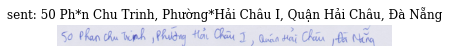

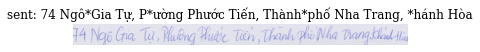

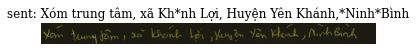

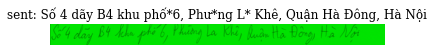

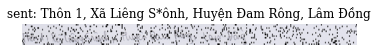

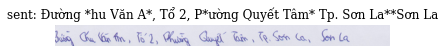

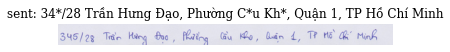

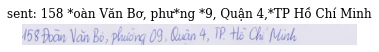

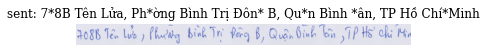

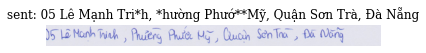

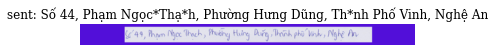

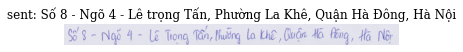

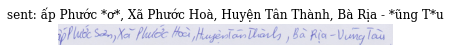

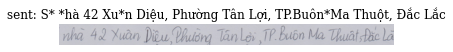

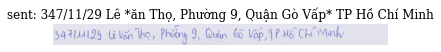

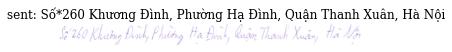

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

iter: 000200 - train loss: 1.186 - lr: 3.96e-05 - load time: 41.46 - gpu time: 136.91
iter: 000400 - train loss: 0.928 - lr: 1.12e-04 - load time: 36.45 - gpu time: 140.59
iter: 000600 - train loss: 0.838 - lr: 2.01e-04 - load time: 37.44 - gpu time: 140.57
iter: 000800 - train loss: 0.804 - lr: 2.73e-04 - load time: 42.60 - gpu time: 140.51
iter: 001000 - train loss: 0.785 - lr: 3.00e-04 - load time: 34.26 - gpu time: 140.63
iter: 001200 - train loss: 0.775 - lr: 3.00e-04 - load time: 39.05 - gpu time: 140.59
iter: 001400 - train loss: 0.764 - lr: 2.99e-04 - load time: 35.62 - gpu time: 140.18
iter: 001600 - train loss: 0.761 - lr: 2.97e-04 - load time: 48.90 - gpu time: 140.89
iter: 001800 - train loss: 0.754 - lr: 2.94e-04 - load time: 39.77 - gpu time: 140.64
iter: 002000 - train loss: 0.752 - lr: 2.91e-04 - load time: 38.17 - gpu time: 140.55
iter: 002200 - train loss: 0.752 - lr: 2.87e-04 - load time: 45.92 - gpu time: 140.95
iter: 002400 - train loss: 0.746 - lr: 2.82e-04 - load

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

NameError: ignored

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()

(0.2647058823529412, 0.74901867)